In [38]:
from multiprocessing import Pool
from numba import jit
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import LinearSegmentedColormap  # colormapをカスタマイズする
import matplotlib.patheffects as pe
import B_JRM33 as BJRM
import B_equator as BEQ
import Leadangle_wave as LeadA
from TScmap import TScmap
import time

In [39]:
RJ = 71492E+3     # [m]
rs0 = 5.9*RJ         # xy平面上での動径距離 [m]
theta0 = np.radians(89.9)
wlong = np.radians(np.linspace(0,360,30))
phi_arr = 2*np.pi-wlong

ds = 20000   # [m]

R_arr = np.zeros(wlong.size)

for j in range(wlong.size):
    # 初期座標 (自転赤道面)
    x = rs0*math.sin(theta0)*math.cos(phi_arr[j])    # [m]
    y = rs0*math.sin(theta0)*math.sin(phi_arr[j])
    z = rs0*math.cos(theta0)

    # 木星自転軸からの距離
    R = math.sqrt(x**2 + y**2)              # [m]
    print(R/RJ)

    rs = rs0
    theta = theta0
    phi = phi_arr[j]

    # 南向きトレース theta = 120 deg まで
    for i in range(5000000):
        Bv = BJRM.B().JRM33(rs, theta, phi)*1E-9
        B0 = math.sqrt(Bv[0]**2 + Bv[1]**2 + Bv[2]**2)

        Bx = Bv[0]*math.sin(theta)*math.cos(phi) \
            + Bv[1]*math.cos(theta)*math.cos(phi) \
            - Bv[2]*math.sin(phi)
        By = Bv[0]*math.sin(theta)*math.sin(phi) \
            + Bv[1]*math.cos(theta)*math.sin(phi) \
            + Bv[2]*math.cos(phi)
        Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

        x += ds*Bx/B0
        y += ds*By/B0
        z += ds*Bz/B0

        # 座標更新 (r, theta, phi)
        rs = math.sqrt(x**2 + y**2 + z**2)
        theta = math.acos(z/rs)
        phi = math.atan2(y, x)

        if theta > math.radians(100):
            print('z [RJ]', z/RJ)
            R = rs
            break

    for i in range(5000000):
        Bv = BJRM.B().JRM33(rs, theta, phi)*1E-9
        B0 = math.sqrt(Bv[0]**2 + Bv[1]**2 + Bv[2]**2)

        Bx = Bv[0]*math.sin(theta)*math.cos(phi) \
            + Bv[1]*math.cos(theta)*math.cos(phi) \
            - Bv[2]*math.sin(phi)
        By = Bv[0]*math.sin(theta)*math.sin(phi) \
            + Bv[1]*math.cos(theta)*math.sin(phi) \
            + Bv[2]*math.cos(phi)
        Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

        x += -ds*Bx/B0
        y += -ds*By/B0
        z += -ds*Bz/B0

        # 木星自転軸からの距離
        R1 = math.sqrt(x**2 + y**2)
        # print(R1/RJ)

        if R > R1:
            print('R [RJ]', R1/RJ, 'z [RJ]', z/RJ)
            break

        R = R1

        # 座標更新 (r, theta, phi)
        rs = math.sqrt(x**2 + y**2 + z**2)
        theta = math.acos(z/rs)
        phi = math.atan2(y, x)
    
    R_arr[j] = R1

5.899991013788398
z [RJ] -0.9405923877786617
R [RJ] 5.333331430386918 z [RJ] -0.9403908922598967
5.899991013788398
z [RJ] -0.9363711571895638
R [RJ] 5.309910409685421 z [RJ] -0.9361729914717757
5.899991013788399
z [RJ] -0.9337473064827567
R [RJ] 5.2950463680733435 z [RJ] -0.9335514058752393
5.899991013788398
z [RJ] -0.9330704041867699
R [RJ] 5.290779582848126 z [RJ] -0.9328754415063888
5.899991013788398
z [RJ] -0.9346246655220843
R [RJ] 5.300101788276239 z [RJ] -0.9344289140491335
5.899991013788398
z [RJ] -0.9391462522422674
R [RJ] 5.325984753580232 z [RJ] -0.93894755329469
5.899991013788398
z [RJ] -0.9471414539256383
R [RJ] 5.371005775585832 z [RJ] -0.9469372573769409
5.899991013788398
z [RJ] -0.9585224934607006
R [RJ] 5.43615410844496 z [RJ] -0.9583100936689732
5.899991013788398
z [RJ] -0.9732174604599514
R [RJ] 5.518994321238559 z [RJ] -0.9729945350113368
5.899991013788398
z [RJ] -0.9899663408609624
R [RJ] 5.614360026903967 z [RJ] -0.9897314759896094
5.899991013788398
z [RJ] -1.0076

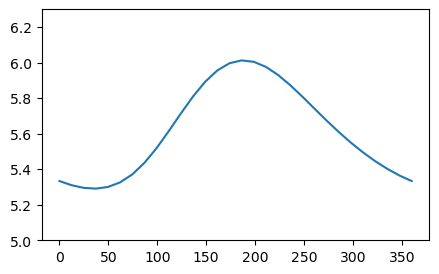

In [42]:
fig, ax = plt.subplots(figsize=(5,3), dpi=100)
ax.set_ylim(5.0, 6.3)
ax.plot(np.degrees(wlong), R_arr/RJ)
plt.show()

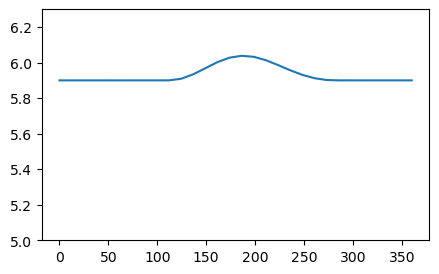

In [45]:
RJ = 71492E+3     # [m]
rs0 = 5.9*RJ         # xy平面上での動径距離 [m]
theta0 = np.radians(89.9)
wlong = np.radians(np.linspace(0,360,30))
phi_arr = 2*np.pi-wlong

ds = 20000   # [m]

R_arr = np.zeros(wlong.size)

for j in range(wlong.size):
    # 初期座標 (自転赤道面)
    x = rs0*math.sin(theta0)*math.cos(phi_arr[j])    # [m]
    y = rs0*math.sin(theta0)*math.sin(phi_arr[j])
    z = rs0*math.cos(theta0)

    # 木星自転軸からの距離
    R = math.sqrt(x**2 + y**2)              # [m]
    # print(R/RJ)

    rs = rs0
    theta = theta0
    phi = phi_arr[j]

    for i in range(5000000):
        Bv = BJRM.B().JRM33(rs, theta, phi)*1E-9
        B0 = math.sqrt(Bv[0]**2 + Bv[1]**2 + Bv[2]**2)

        Bx = Bv[0]*math.sin(theta)*math.cos(phi) \
            + Bv[1]*math.cos(theta)*math.cos(phi) \
            - Bv[2]*math.sin(phi)
        By = Bv[0]*math.sin(theta)*math.sin(phi) \
            + Bv[1]*math.cos(theta)*math.sin(phi) \
            + Bv[2]*math.cos(phi)
        Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

        x += ds*Bx/B0
        y += ds*By/B0
        z += ds*Bz/B0

        # 木星自転軸からの距離
        R1 = math.sqrt(x**2 + y**2)
        # print(R1/RJ)

        if R > R1:
            # print('R [RJ]', R1/RJ, 'z [RJ]', z/RJ)
            break

        R = R1

        # 座標更新 (r, theta, phi)
        rs = math.sqrt(x**2 + y**2 + z**2)
        theta = math.acos(z/rs)
        phi = math.atan2(y, x)
    
    R_arr[j] = R1

fig, ax = plt.subplots(figsize=(5,3), dpi=100)
ax.set_ylim(5.0, 6.3)
ax.plot(np.degrees(wlong), R_arr/RJ)
plt.show()

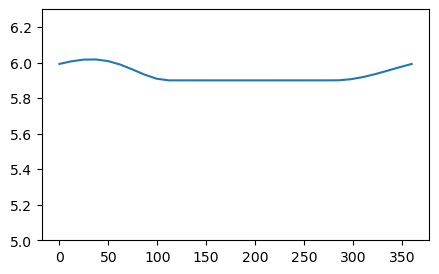

In [46]:
RJ = 71492E+3     # [m]
rs0 = 5.9*RJ         # xy平面上での動径距離 [m]
theta0 = np.radians(89.9)
wlong = np.radians(np.linspace(0,360,30))
phi_arr = 2*np.pi-wlong

ds = 20000   # [m]

R_arr = np.zeros(wlong.size)

for j in range(wlong.size):
    # 初期座標 (自転赤道面)
    x = rs0*math.sin(theta0)*math.cos(phi_arr[j])    # [m]
    y = rs0*math.sin(theta0)*math.sin(phi_arr[j])
    z = rs0*math.cos(theta0)

    # 木星自転軸からの距離
    R = math.sqrt(x**2 + y**2)              # [m]
    # print(R/RJ)

    rs = rs0
    theta = theta0
    phi = phi_arr[j]

    for i in range(5000000):
        Bv = BJRM.B().JRM33(rs, theta, phi)*1E-9
        B0 = math.sqrt(Bv[0]**2 + Bv[1]**2 + Bv[2]**2)

        Bx = Bv[0]*math.sin(theta)*math.cos(phi) \
            + Bv[1]*math.cos(theta)*math.cos(phi) \
            - Bv[2]*math.sin(phi)
        By = Bv[0]*math.sin(theta)*math.sin(phi) \
            + Bv[1]*math.cos(theta)*math.sin(phi) \
            + Bv[2]*math.cos(phi)
        Bz = Bv[0]*math.cos(theta) - Bv[1]*math.sin(theta)

        x += -ds*Bx/B0
        y += -ds*By/B0
        z += -ds*Bz/B0

        # 木星自転軸からの距離
        R1 = math.sqrt(x**2 + y**2)
        # print(R1/RJ)

        if R > R1:
            # print('R [RJ]', R1/RJ, 'z [RJ]', z/RJ)
            break

        R = R1

        # 座標更新 (r, theta, phi)
        rs = math.sqrt(x**2 + y**2 + z**2)
        theta = math.acos(z/rs)
        phi = math.atan2(y, x)
    
    R_arr[j] = R1

fig, ax = plt.subplots(figsize=(5,3), dpi=100)
ax.set_ylim(5.0, 6.3)
ax.plot(np.degrees(wlong), R_arr/RJ)
plt.show()